<div style="text-align: center">
    <div style="font-size: xxx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">
        ObsPy - Signal Processing
    </div>
    <div style="font-size: x-large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">
        Trim + Detrend + Taper + IRC + Filter + Resample
    </div>
</div>

Before signals processing can be started the raw seismometer output has to be converted to MSEED or SAC format. We can then read in and preprocess the MSEED or SAC data. 

Most methods that work on a Trace object also work on a Stream object. They are simply executed for every trace. [See ObsPy documentation for an overview of available methods](http://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html) (or try **`st.<Tab>`**).
 - **`st.filter()`** - Filter all attached traces.
 - **`st.trim()`** - Cut all traces.
 - **`st.resample()`** / **`st.decimate()`** - Change the sampling rate.
 - **`st.trigger()`** - Run triggering algorithms.
 - **`st.plot()`** / **`st.spectrogram()`** - Visualize the data.
 - **`st.attach_response()`**/**`st.remove_response()`**, **`st.simulate()`** - Instrument correction
 - **`st.merge()`**, **`st.normalize()`**, **`st.detrend()`**, **`st.taper()`**, ...

Processing seismic signals is a core feature of ObsPy. As such we can easily perform:
- Trimming
- Detrending
- Tapering
- Instrument Response Correction
- Filtering
- Resampling

**NOTE**: Usually this is also the order in which data is pre-processed.

**NOTE**: Performing these operations on a `Trace` or `Stream` will alter the data. If you want to still have access to the unaltered state you can make a copy beforehand with `trace.copy()` or `stream.copy()`.

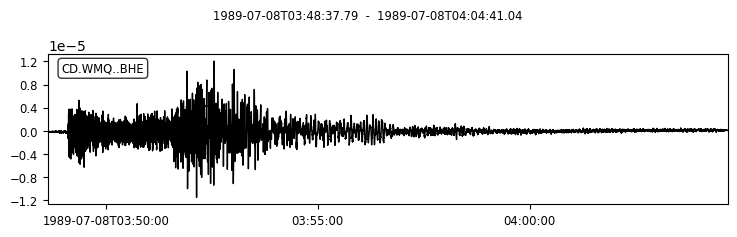

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

In [45]:
from obspy import read

# Example data
stream = read('lecture_17/kazahkhstan_08.07.1989.mseed')
trace = stream[0]
fig = trace.plot()
plt.show(fig)
trace

## Trimming

Trimming cuts of parts of a time series. Use this to remove periods of no signal

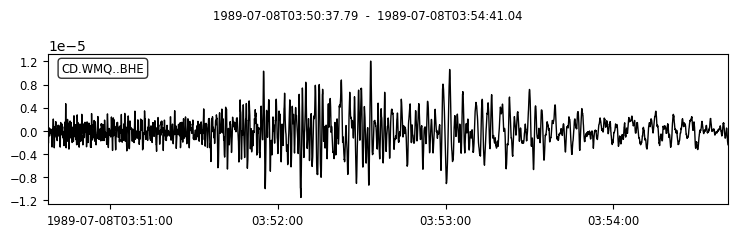

CD.WMQ..BHE | 1989-07-08T03:50:37.790000Z - 1989-07-08T03:54:41.040000Z | 20.0 Hz, 4866 samples

In [46]:
trimmed = trace.copy()
trimmed.trim(trace.stats.starttime + 60 * 2, trace.stats.endtime - 60 * 10)
fig = trimmed.plot()
plt.show(fig)
trimmed

In [47]:
client = Client("IRIS")
start = UTCDateTime("1989-07-08T03:40:00.0")
end = UTCDateTime("1989-07-08T04:05:00.0")
stream = client.get_waveforms(
    "CD", "WMQ", "", "BH*", start, end,
    attach_response = True # Tell the client to retrieve the instrument response
)
stream.remove_response() # Remove instrument response

3 Trace(s) in Stream:
CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples
CD.WMQ..BHN | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples
CD.WMQ..BHZ | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

## Detrending

Remove a trend from the trace.

For more details on pitfalls see: [Lecture on preprocessing](lecture_16_theory_spectral_analysis_preprocessing.ipynb)

### simple

Subtracts a linear function defined by first/last sample of the trace.

We can see the linear function within the detrended data if we look closely!

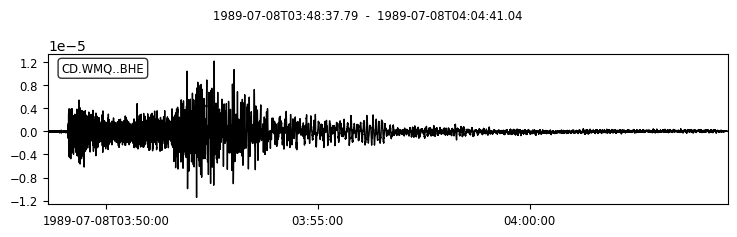

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

In [48]:
tr = trace.copy()
tr.detrend("simple")
fig = tr.plot()
plt.show(fig)
tr

### linear

Fits a linear function with least squares and subtracts it.

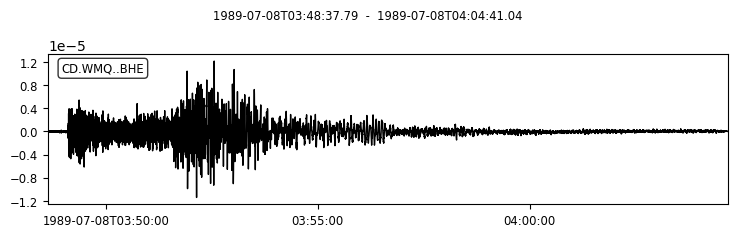

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

In [49]:
tr = trace.copy()
tr.detrend("linear")
fig = tr.plot()
plt.show(fig)
tr

### demean

Subtract the mean of the data.

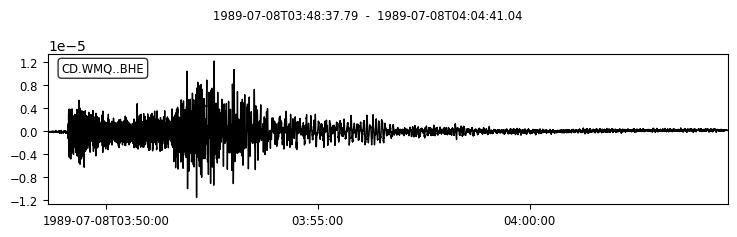

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

In [50]:
tr = trace.copy()
tr.detrend("demean")
fig = tr.plot()
plt.show(fig)
tr

## Tapering

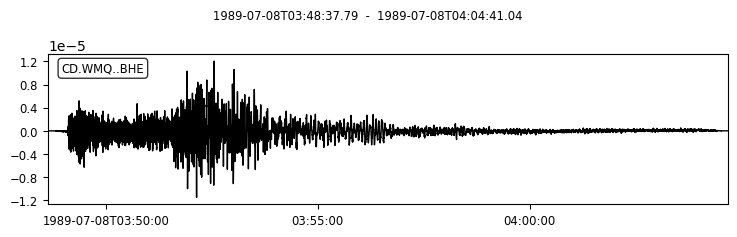

In [51]:
tr = trace.copy()
tr.taper(type = 'hann', max_percentage = 0.05)
fig = tr.plot()
plt.show()

## Instrument Response Correction

More details in the next lecture: [Obspy - Instrument correction](lecture_18_obspy_instrument_response.ipynb)

Seismometers are usually designed to record signals over a specified range of frequencies (or periods). When recording the ground motion they act as a filter and convolve the ground motion with their instrument response. 
The instrument response characterizes a seismometer and describes the range of frequencies the instrument is sensitive to.

Performing an instrument response correction e.g. using a stationXML file on raw seismic data deconvolves the instrument response and returns the "true" ground motion f.e. in velocity. 

**NOTE:** You need to detrend and taper before removing the instrument response!  
see: [Lecture on filter theory](lecture_15_theory_filter.ipynb)

## Filter

Filtering can be used to remove certain frequencies.

We can choose from various filtering techniques:
* lowpass
* highpass
* bandpass
* bandstop

**NOTE:** You need to detrend and taper before filtering!  
see: [Lecture on filter theory](lecture_15_theory_.ipynb)

### lowpass

Frequencies lower than the corner frequency `freq` will pass

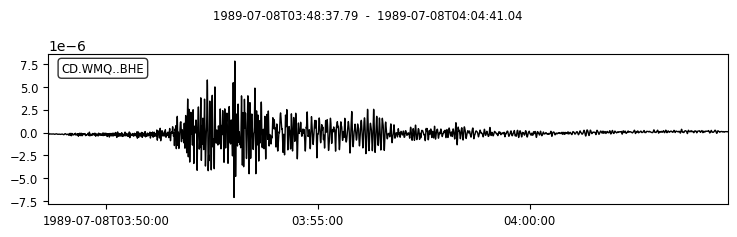

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

In [52]:
lowpass = trace.copy()
lowpass.filter("lowpass", freq=0.5)
fig = lowpass.plot()
plt.show(fig)
lowpass

### highpass

Frequencies higher than the corner frequency `freq` will pass

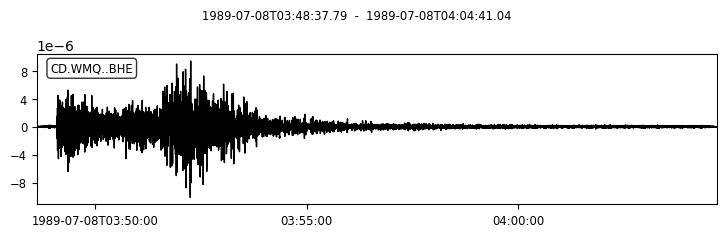

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

In [53]:
highpass = trace.copy()
highpass.filter("highpass", freq=0.5)
fig = highpass.plot()
plt.show(fig)
highpass

### bandpass

Frequencies within a certain frequency range will pass

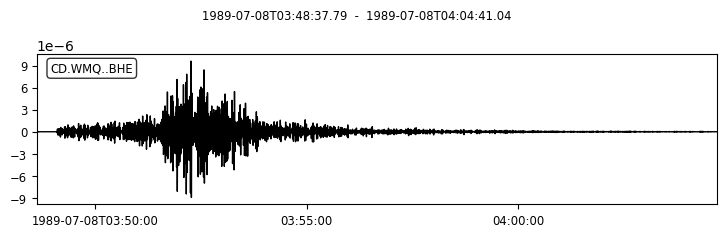

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

In [54]:
bandpass = trace.copy()
bandpass.filter("bandpass", freqmin=0.5, freqmax=1.2)
fig = bandpass.plot()
plt.show(fig)
bandpass

### bandstop

Opposite of bandpass filter. Frequencies within a certain range will not pass

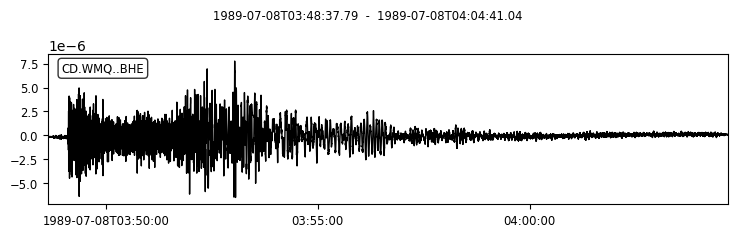

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples

In [55]:
bandstop = trace.copy()
bandstop.filter("bandstop", freqmin=0.5, freqmax=1.2)
fig = bandstop.plot()
plt.show(fig)
bandstop

### Overview of all of the above filters

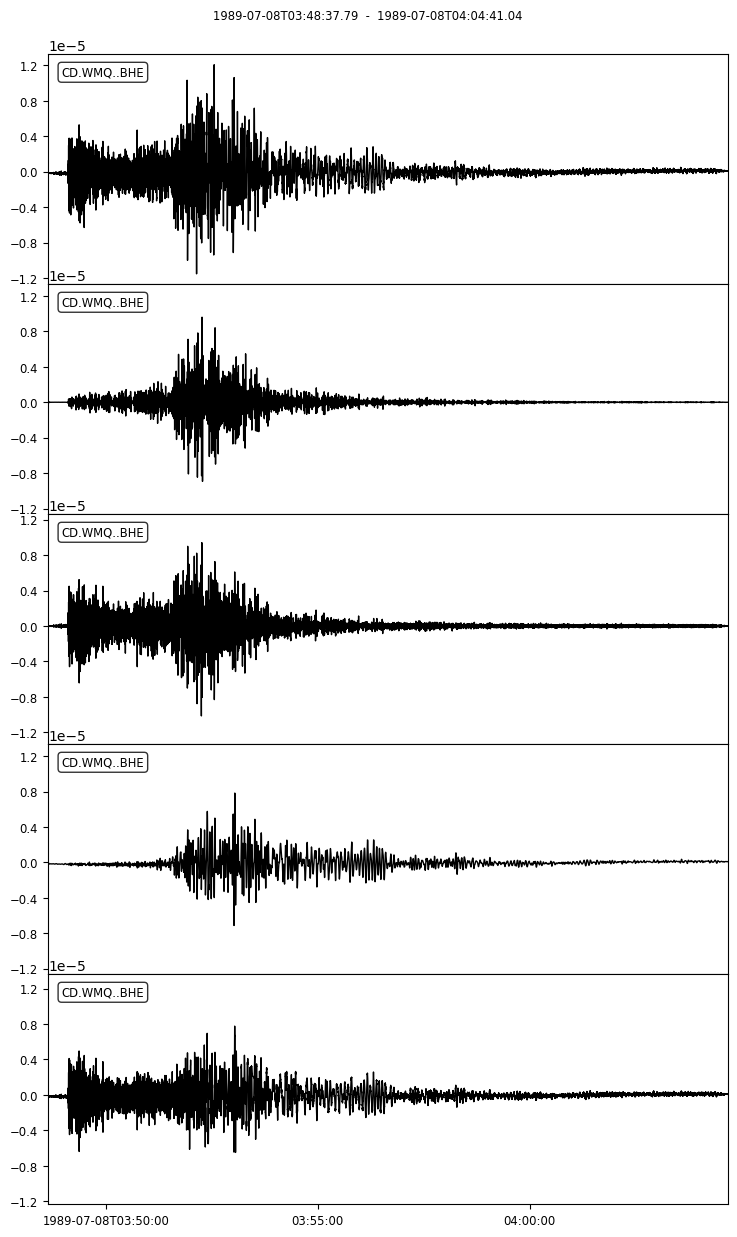

In [56]:
from obspy import Stream
all_traces = Stream([trace, lowpass, highpass, bandpass, bandstop])
fig = all_traces.plot()
plt.show(fig)

## Resampling

Change the sampling rate of the data.

**NOTE:** You need to lowpass filter the data with the new Nyquist frequency before downsampling it!

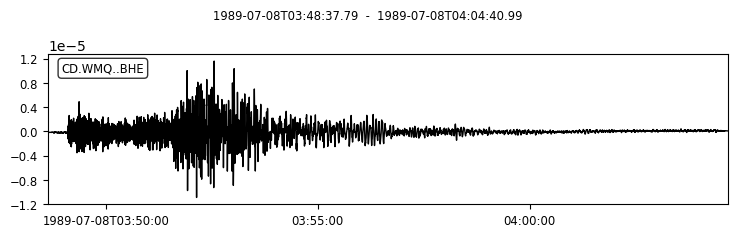

CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:40.990000Z | 10.0 Hz, 9633 samples

In [57]:
tr = trace.copy()
tr.resample(sampling_rate=10.0)
fig = tr.plot()
plt.show(fig)
tr

# Generating Synthetic data

It is sometimes useful to generate synthetic data to quickly test code or to play around with other features like the ones mentioned above.

Because the data stored by Obspy is a NumPy array, we can use NumPy to generate random data.

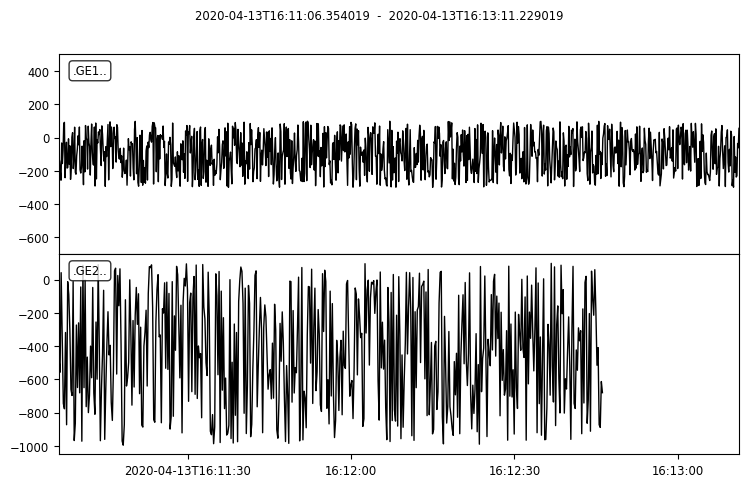

In [58]:
from obspy import Stream, Trace
import numpy as np
import matplotlib.pyplot as plt

trace1 = Trace(data=np.random.randint(-300, 100, 1000))
trace1.stats.starttime = UTCDateTime() # now
trace1.stats.station = "GE1"
trace1.stats.sampling_rate = 8.0

trace2 = Trace(data=np.random.randint(-1000, 100, 500))
trace2.stats.starttime = UTCDateTime() # now
trace2.stats.station = "GE2"
trace2.stats.sampling_rate = 5.0

stream = Stream([trace1, trace2])
fig = stream.plot()
plt.show(fig)

### Next excercise: [Exercise 18](exercise_18_obspy_signal_processing.ipynb)
### Next lecture: [Python - Obspy - Instrument Response](lecture_19_obspy_instrument_response.ipynb)

---
##### Authors:
* [Julian Niedermeier](https://github.com/sleighsoft)
* Eva Eibl ([@evaeibl](https://github.com/evaeibl))